In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
user=pd.read_csv("Zoo_lyst7412.csv")

In [19]:
user.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [20]:
user.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [21]:
user.shape

(101, 18)

In [22]:
user.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [23]:
u1=user.drop(columns="animal name")  
u1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [24]:
u1.shape

(101, 17)

In [36]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(u1,test_size=0.25)

In [37]:
x_train=train.iloc[:,0:16]
y_train=train.iloc[:,16]

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNC


In [39]:
acc= []

for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16], train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])

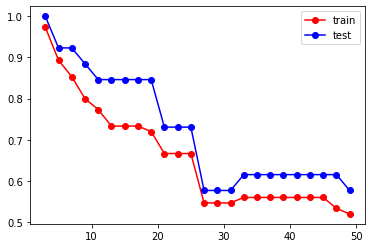

In [40]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc], "ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc], "bo-")
plt.legend(["train","test"])
plt.show()

In [41]:
acc1= []

for i in range(1,12,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16], train.iloc[:,16])
    train_acc1=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc1=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc1.append([train_acc1,test_acc1])

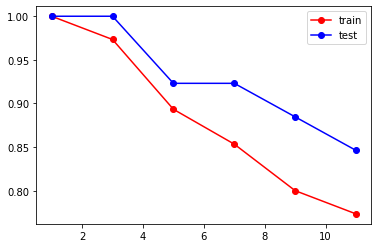

In [42]:
plt.plot(np.arange(1,12,2),[i[0] for i in acc1], "ro-")
plt.plot(np.arange(1,12,2),[i[1] for i in acc1], "bo-")
plt.legend(["train","test"])
plt.show()

In [43]:
neigh=KNC(n_neighbors=1)
neigh.fit(train.iloc[:,0:16], train.iloc[:,16])
x_train=train.iloc[:,0:16]
y_train=train.iloc[:,16]
y_pred=neigh.predict(x_train)
train_acc=np.mean(y_pred==y_train)
print(train_acc)

test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
print(test_acc)

1.0
1.0
